HR Competency Scores for Screening

Context
Recruitment and candidate selection play a critical role in determining the success of an organization. An effective initial screening process can significantly improve the quality of the hiring pool and increase the chances of finding the right candidate for any given role. This dataset focuses on both behavioral and functional competency scores, which are essential aspects of a candidate's potential fit and contribution to the organization.

Sources
The data in this dataset has been collected from an anonymous company's internal HR department and published in a normalized form. The dataset combines the scores from two key assessments:

Functional competency test: Utilized to evaluate a candidate's hard skills and domain knowledge.
HR behavior test: An assessment tool focused on evaluating soft or behavior skills, crucial for teamwork and adaptability within an organization.
Young Researchers' Contribution
We were approached by a group of young researchers interested in the explainable AI (XAI) problem. They aimed to analyze HR data to understand why specific candidates were called for interviews while others were not. With their valuable input and help in preprocessing the data, we have made this dataset available for the wider research community.

Inspiration
The inspiration behind sharing this dataset was the growing need for insights into the hiring process and the importance of selecting candidates who possess a balance of functional and behavioral competencies. With the added value of XAI research, we hope to encourage researchers and data scientists to analyze the initial screening process, build models to optimize candidate selection, explain their decisions, and uncover new insights that can enhance recruitment strategies.

The dataset can be employed for a wide range of applications, including:

Identifying the most significant factors in determining a candidate's eligibility for an interview.
Developing machine learning models to predict and explain the likelihood of a candidate being called for an interview.
Analyzing the balance between functional competencies and behavioral skills required for a good fit in the organization.
Investigating the impact of different skill combinations on the overall competency scores.
We hope this dataset inspires researchers to explore new dimensions of the hiring process and contribute to building better and more transparent recruitment strategies.

Import Libs

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve,RocCurveDisplay
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, classification_report

Read Data

In [2]:
df=pd.read_csv('dataset.csv')

View Head

In [3]:
df.head()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1


Check if any Null Values

In [4]:
df.isnull().sum()

years_of_experience            0
functional_competency_score    0
top1_skills_score              0
top2_skills_score              0
top3_skills_score              0
behavior_competency_score      0
top1_behavior_skill_score      0
top2_behavior_skill_score      0
top3_behavior_skill_score      0
call_for_interview             0
dtype: int64

CHeck Datatype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   years_of_experience          300 non-null    float64
 1   functional_competency_score  300 non-null    float64
 2   top1_skills_score            300 non-null    float64
 3   top2_skills_score            300 non-null    float64
 4   top3_skills_score            300 non-null    float64
 5   behavior_competency_score    300 non-null    float64
 6   top1_behavior_skill_score    300 non-null    float64
 7   top2_behavior_skill_score    300 non-null    float64
 8   top3_behavior_skill_score    300 non-null    float64
 9   call_for_interview           300 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 23.6 KB


Check Unique Values

In [6]:
for i in df.columns:
    print(i,"---->",df[i].unique())

years_of_experience ----> [0.33333333 0.13333333 0.         0.4        0.8        0.26666667
 0.06666667 0.2        0.46666667 0.86666667 0.66666667 0.6
 0.73333333 0.53333333 0.93333333 1.        ]
functional_competency_score ----> [0.74949778 0.49063778 0.46025556 0.50734667 0.66202    0.58515778
 0.69194667 0.47788667 0.66273556 0.49287556 0.54653556 0.50147778
 0.59120889 0.45783778 0.34519778 0.57704667 0.47930889 0.9071
 0.72657556 0.69563556 0.22222222 0.41524    0.47276444 0.42065778
 0.66708    0.         0.72954    0.46404889 0.57995556 0.72724889
 0.72304    0.52866444 0.11111111 0.53268444 0.66115778 0.81604889
 0.77166    0.65665556 0.53168667 1.         0.58412889 0.59606
 0.61490444 0.66226667 0.40472667 0.67239778 0.47832    0.70783556
 0.61662444 0.55107556 0.60184667 0.74990444 0.52016    0.55159778
 0.60026667 0.44444444 0.41770444 0.57466444 0.68188667 0.86147556
 0.39332444 0.49910889 0.64959778 0.47208889 0.5959     0.56072667
 0.61468444 0.49781556 0.57524667 0.4

Check Shape

In [27]:
df.shape

(300, 10)

Columns Name

In [7]:
df.columns

Index(['years_of_experience', 'functional_competency_score',
       'top1_skills_score', 'top2_skills_score', 'top3_skills_score',
       'behavior_competency_score', 'top1_behavior_skill_score',
       'top2_behavior_skill_score', 'top3_behavior_skill_score',
       'call_for_interview'],
      dtype='object')

Plot Histogram 

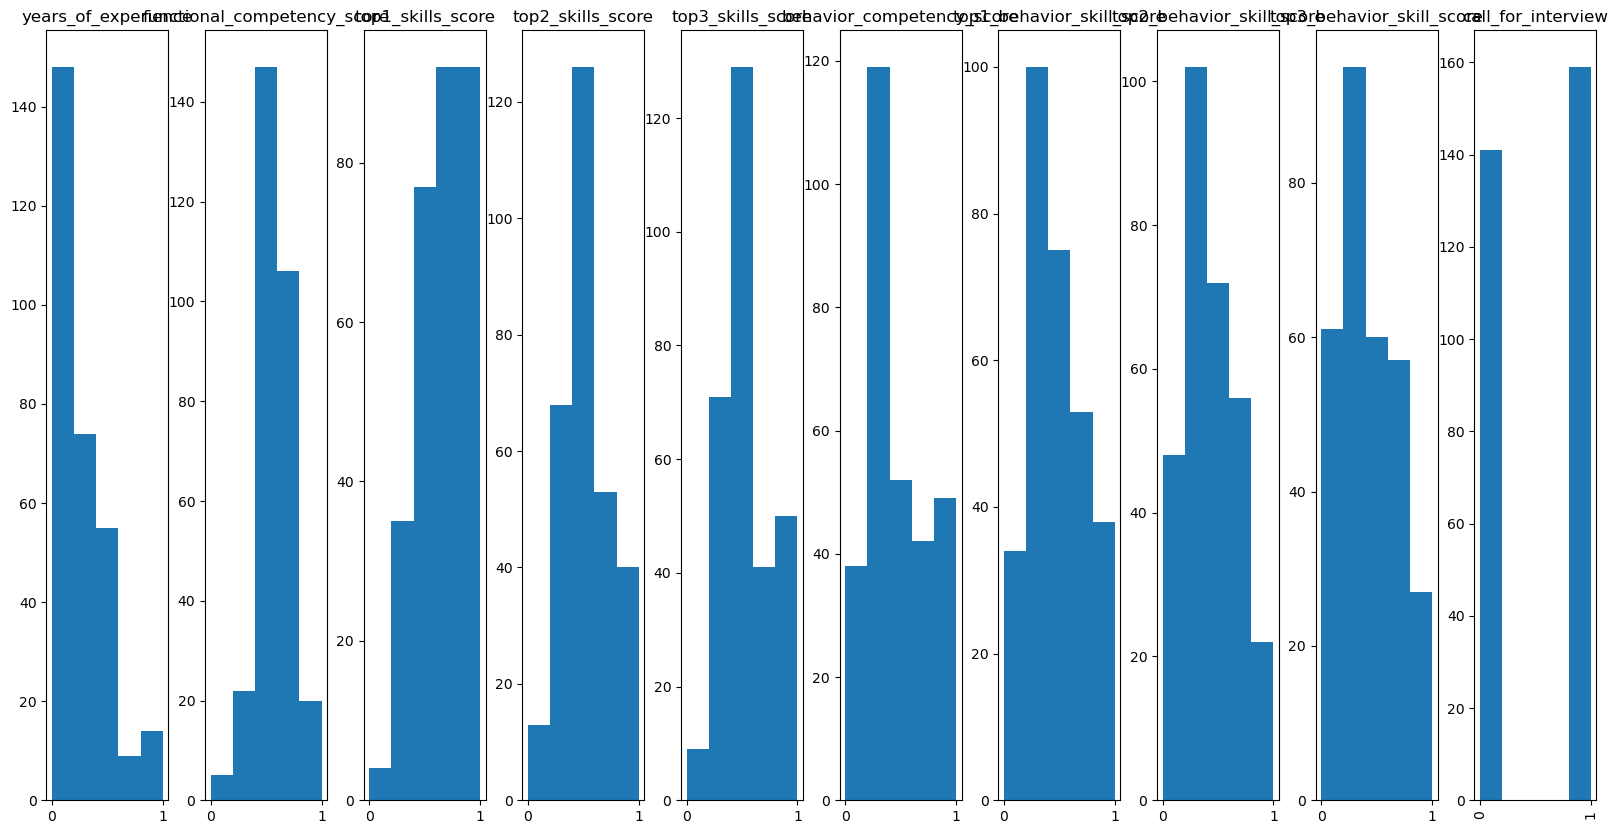

In [39]:
fig, axis = plt.subplots(1,10,figsize=(20,10))
df.hist(ax=axis,bins=5,grid=False)
plt.xticks(rotation=90)
plt.show()

Heatmap 

<AxesSubplot:>

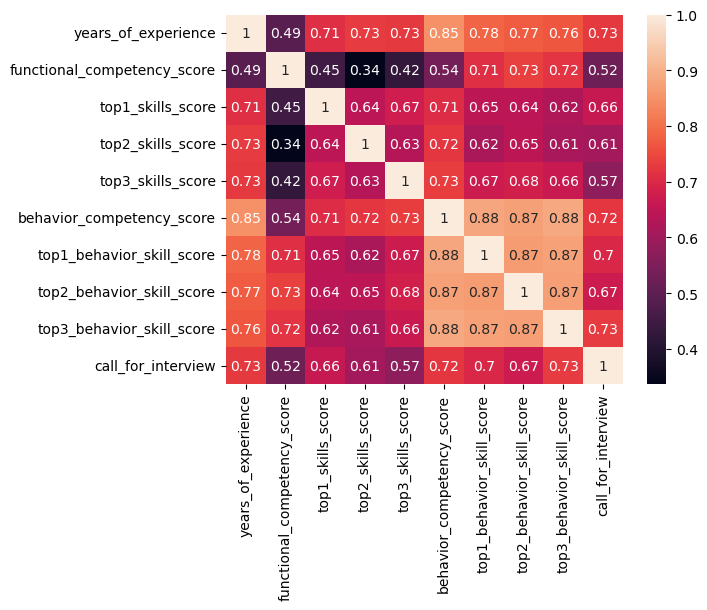

In [71]:
sns.heatmap(df.corr(),annot=True)

Round years of experience with one decimal 

In [58]:
df['years_of_experience'] = round(df['years_of_experience'],1)

Bar plot ( Years of experience - call of experience)

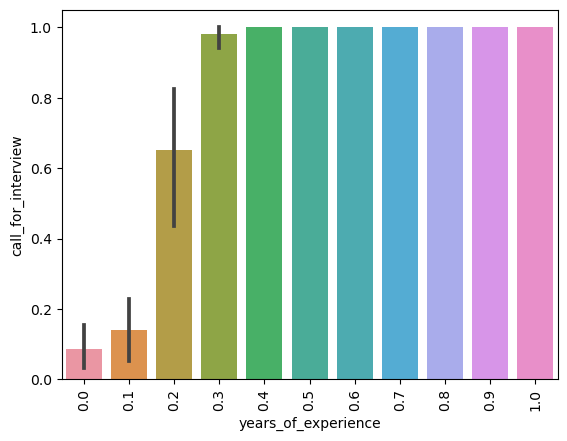

In [47]:
sns.barplot(
    data=df,
    x="years_of_experience", y="call_for_interview",
)
plt.xticks(rotation=90)
plt.show()

Line Chart (functional_competency_score - call_for_interview)

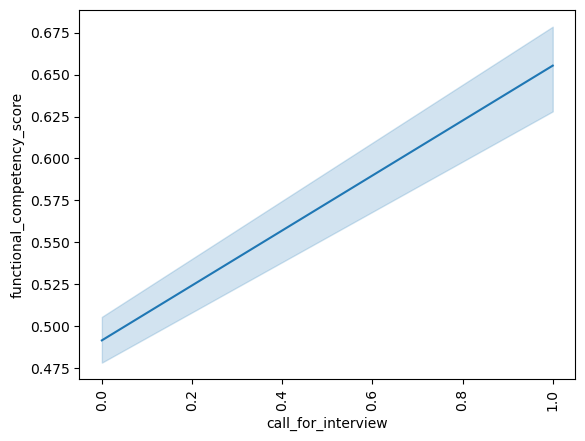

In [50]:
sns.lineplot(
    data=df,
    y="functional_competency_score", x="call_for_interview",
)
plt.xticks(rotation=90)
plt.show()

Line chart (top1_skills_score - call_for_interview)

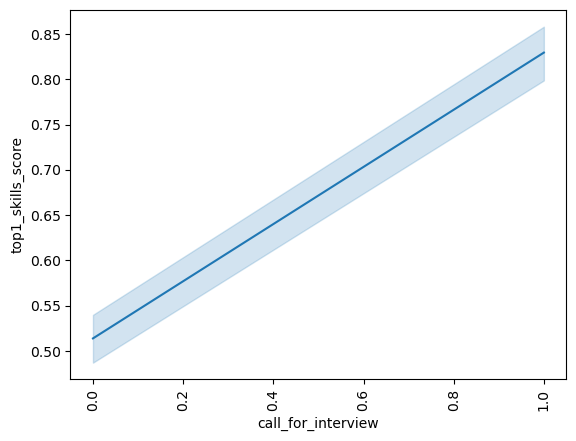

In [51]:
sns.lineplot(
    data=df,
    y="top1_skills_score", x="call_for_interview",
)
plt.xticks(rotation=90)
plt.show()

Line Chart (top2_skills_score - call_for_interview)

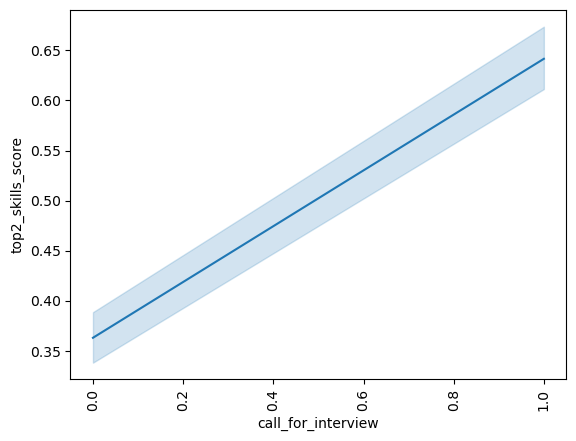

In [52]:
sns.lineplot(
    data=df,
    y="top2_skills_score", x="call_for_interview",
)
plt.xticks(rotation=90)
plt.show()

Round Behaviour_competency_score for better graph view

In [90]:
df['behavior_competency_score'] = round(df['behavior_competency_score'],1)

Line plot (behaviour_competency_score - call_for_interview)

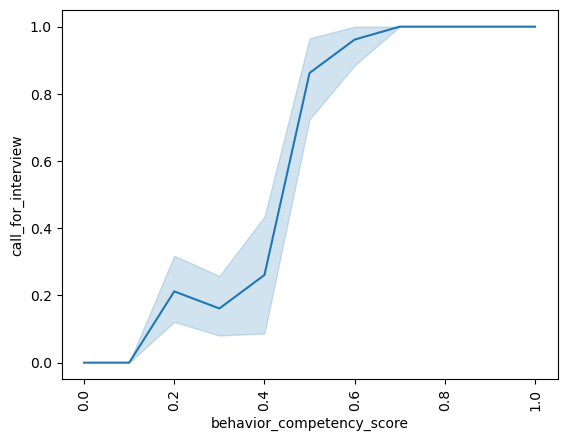

In [57]:
sns.lineplot(
    data=df,
    x="behavior_competency_score", y="call_for_interview",
)
plt.xticks(rotation=90)
plt.show()

Line plot (top1_behaviour_skill_score - call_for_interview)

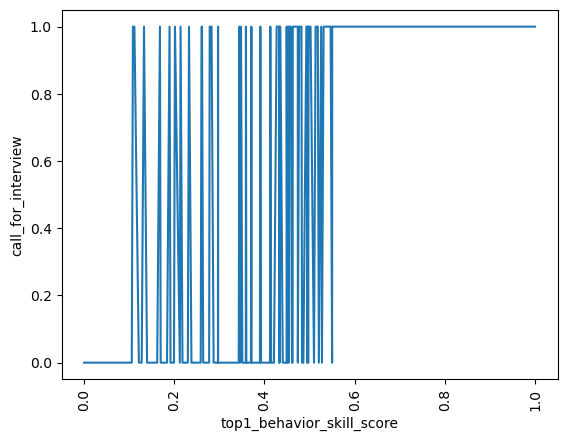

In [63]:
sns.lineplot(
    data=df,
    x="top1_behavior_skill_score", y="call_for_interview",
)
plt.xticks(rotation=90)
plt.show()

Line plot (top2_behavior_skill_score - call_for_interview)

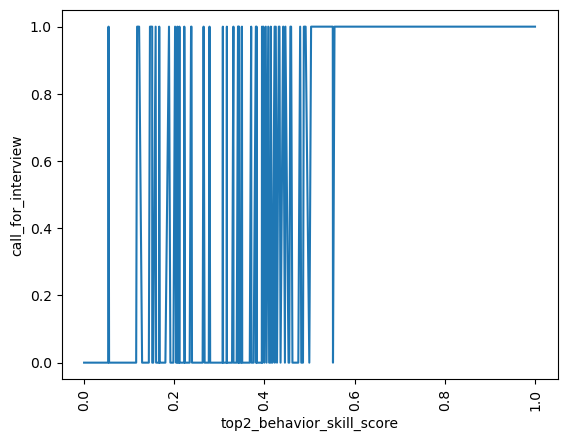

In [64]:
sns.lineplot(
    data=df,
    x="top2_behavior_skill_score", y="call_for_interview",
)
plt.xticks(rotation=90)
plt.show()

Line Plot (top3_behaviour_skill_score - call_for_interview)

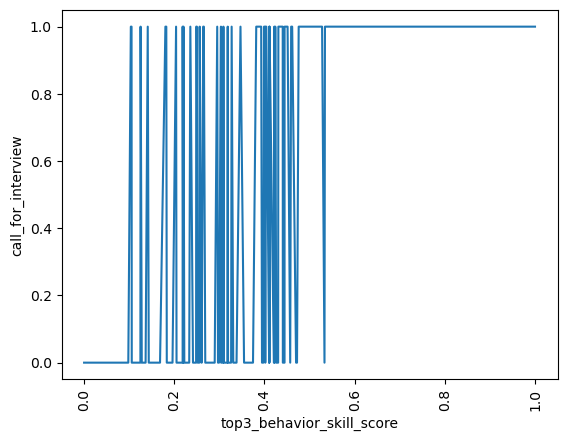

In [65]:
sns.lineplot(
    data=df,
    x="top3_behavior_skill_score", y="call_for_interview",
)
plt.xticks(rotation=90)
plt.show()

Boxplot

<Figure size 1000x1500 with 0 Axes>

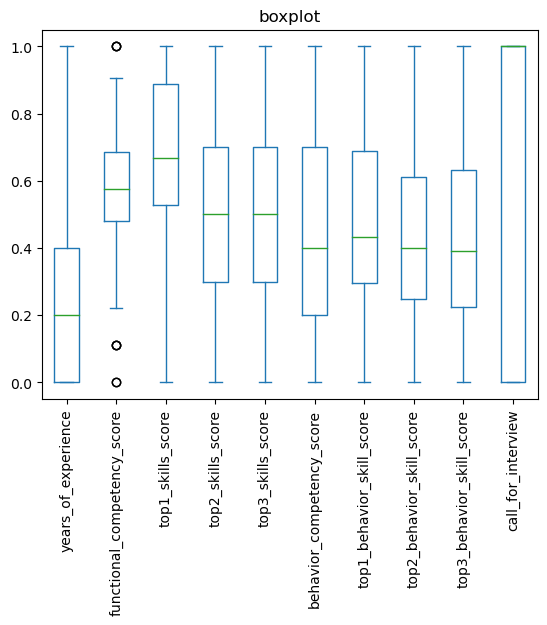

In [70]:
plt.figure(figsize=(10,15))
ax = df.plot(kind='box', title='boxplot')
plt.xticks(rotation=90)
plt.show()

Model Building 

We are going for Logistic Regression

In [72]:
X = df.drop('call_for_interview', axis=1)
y = df['call_for_interview']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
logistic_model = LogisticRegression()

In [77]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [78]:
logistic_prediction = logistic_model.predict(X_test)

In [80]:
confusion_matrix(y_test, logistic_prediction)

array([[33,  0],
       [ 6, 21]], dtype=int64)

In [81]:
accuracy_score(y_test, logistic_prediction)

0.9

In [83]:
print(classification_report(y_test,logistic_prediction))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       1.00      0.78      0.88        27

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60



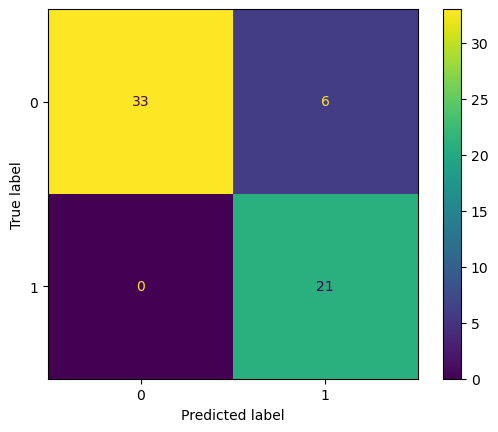

In [85]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(logistic_prediction,y_test)).plot()


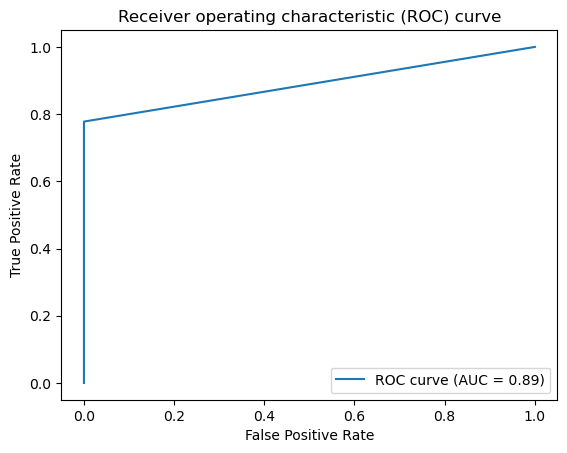

In [88]:
from sklearn.metrics import roc_auc_score,roc_curve, roc_auc_score,auc
fpr, tpr, thresholds = roc_curve(y_test, logistic_prediction)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")

In [89]:
##END